In [2]:
""Much appreciated for your updates, Rui. I will soon dive into your submission and let you know if I have any feedback.

Moving forward, please start the next project below this week:

In the constantly evolving financial markets, understanding the intricate relationships between different stocks and major indices
provides valuable insights into market dynamics and potential risks. Historically, the S&P 500 and Dow Jones Industrial Average (DJIA) 
have been two of the primary benchmarks that investors and analysts utilize to gauge market performance and sentiments. 
Each index comprises a different set of companies with its unique industry representation and risk factors. Correlation analysis 
has emerged as a powerful tool in portfolio management, risk mitigation, and investment strategy formulation. By examining how the daily 
returns of individual stocks correlate with these benchmark indices, we can glean insights into systemic risks, company-specific 
volatility,and overall market sensitivity.

Project Mission:
Our project aims to employ Python to visually and quantitatively explore the correlation relationships between individual companies
within 
    these 2 indices against their respective benchmark index. You can use data sources like Yahoo Finance and their Python API to 
    retrieve their historical daily price data.

Main Goal:
Filtering and Analysis: Please develop a computational methodology to filter and identify companies that exhibit a high 
correlation (greater than 0.7) with their respective 2 indices over the past three years. Do not cross-compare, meaning you 
can't correlate one index's stocks with another's while filtering, and vice versa. In this process, you will also need to find 
live-updating sources that can provide the most up-to-date information about these 2 indices' stock tickers to get their price data. 
This will aid in pinpointing stocks that closely follow market movements and are potentially more exposed to systemic market risks.

Upon completion, our study will offer a clearer understanding of the interrelationships between stocks and their benchmark indices. 
This understanding is pivotal for investors looking to align their portfolios with market movements, hedge against systemic risks, or 
exploit stock-specific anomalies. The deliverables will be presented in a .py file for comprehensive examination and accessibility.


SyntaxError: unterminated string literal (detected at line 22) (2131578683.py, line 22)

In [ ]:
#build up data dashboard & data cleaning

In [66]:
!pip install yfinance

import yfinance as yf
import pandas as pd
import numpy as np

#using yfinance

sp_500 = yf.Ticker("^GSPC").history(period="1y")
dji = yf.Ticker("^DJI").history(period="1y")

print ("S&P 1 year index")
print (sp_500)

print ("DJI 1 year index")
print (dji)


S&P 1 year index
                                  Open         High          Low        Close  \
Date                                                                            
2024-06-03 00:00:00-04:00  5297.149902  5302.109863  5234.319824  5283.399902   
2024-06-04 00:00:00-04:00  5278.240234  5298.799805  5257.629883  5291.339844   
2024-06-05 00:00:00-04:00  5314.479980  5354.160156  5297.640137  5354.029785   
2024-06-06 00:00:00-04:00  5357.799805  5362.350098  5335.359863  5352.959961   
2024-06-07 00:00:00-04:00  5343.810059  5375.080078  5331.330078  5346.990234   
...                                ...          ...          ...          ...   
2025-05-27 00:00:00-04:00  5854.069824  5924.330078  5854.069824  5921.540039   
2025-05-28 00:00:00-04:00  5925.540039  5939.919922  5881.879883  5888.549805   
2025-05-29 00:00:00-04:00  5939.959961  5943.129883  5873.799805  5912.169922   
2025-05-30 00:00:00-04:00  5903.669922  5922.140137  5843.660156  5911.689941   
2025-06-02 

In [68]:
#data cleaning 

#checking null_value
print("sp_500 null：\n", sp_500.isnull().sum())
print("DJI NULL：\n", dji.isnull().sum())

sp_500 null：
 Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64
DJI NULL：
 Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


In [ ]:
#Single Stock as a benchmark

In [106]:
# select AAPL as example
aapl = yf.download("AAPL", start="2022-05-25", end="2025-05-25"
                    ,auto_adjust=False )

print(data.columns.tolist())
#calculate Rate of Return from a sample
adj_close = aapl['Adj Close']
daily_returns = adj_close.pct_change() 

# print outcome ?how to setting typical period
print("latest 5days：")
print(daily_returns.tail())

if not daily_returns.empty:
    max_return = daily_returns.max().item() 
    min_return = daily_returns.min().item()
    print(f"The largest single-day increase：{max_return:.2%}") 
    print(f"The largest single-day decrease：{min_return:.2%}")
else:
    print("ROR IS 0")

[*********************100%***********************]  1 of 1 completed

[('Close', 'AAPL'), ('Close', '^GSPC'), ('High', 'AAPL'), ('High', '^GSPC'), ('Low', 'AAPL'), ('Low', '^GSPC'), ('Open', 'AAPL'), ('Open', '^GSPC'), ('Volume', 'AAPL'), ('Volume', '^GSPC')]
latest 5days：
Ticker          AAPL
Date                
2025-05-19 -0.011739
2025-05-20 -0.009196
2025-05-21 -0.023059
2025-05-22 -0.003612
2025-05-23 -0.030244
The largest single-day increase：15.33%
The largest single-day decrease：-9.25%


[*********************100%***********************]  2 of 2 completed

Co-related：0.716 (P Value：0.0000)


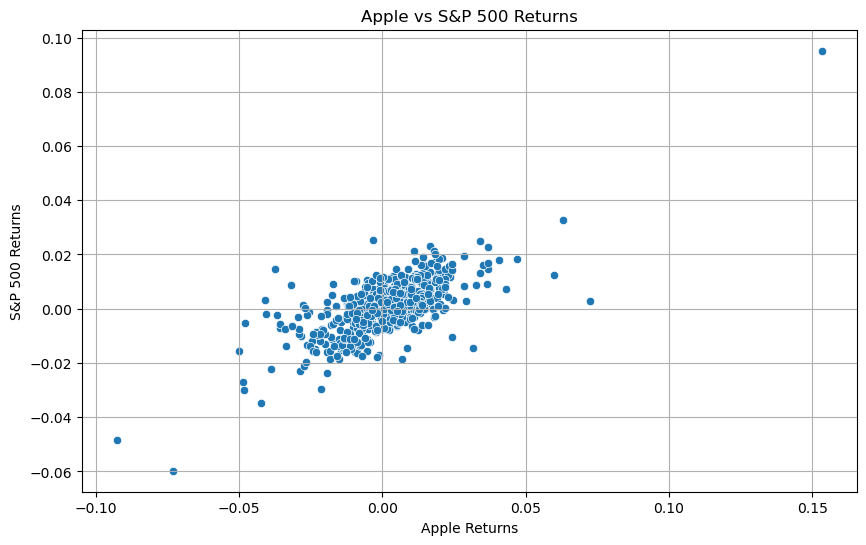

In [104]:
# select a ticker as testing
import scipy.stats as stats
#  Download data using yfinance
tickers = ['AAPL', '^GSPC']  # Apple and S&P 500
start_date = '2023-01-01'
end_date = '2025-5-23'

# Download the data
# First, let's check what columns are available
data = yf.download(tickers, start=start_date, end=end_date)
# Use 'Close' instead of 'Adj Close' if 'Adj Close' is not available
if 'Adj Close' in data.columns.levels[0]:
    price_data = data['Adj Close']
else:
    price_data = data['Close']  # Fallback to 'Close' prices

# Calculate daily returns
returns = price_data.pct_change().dropna()

# Rename columns for clarity
cleaned_returns = returns.rename(columns={'^GSPC': 'sp_500'})

# Step 3: Now run your correlation analysis with the prepared data
corr_coef, p_value = stats.pearsonr(cleaned_returns['AAPL'], cleaned_returns['sp_500'])
print(f"Co-related：{corr_coef:.3f} (P Value：{p_value:.4f})")

# Optional: Visualize the correlation
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=cleaned_returns['AAPL'], y=cleaned_returns['sp_500'])
plt.title('Apple vs S&P 500 Returns')
plt.xlabel('Apple Returns')
plt.ylabel('S&P 500 Returns')
plt.grid(True)
plt.show()

In [ ]:
"A[data mining] --> B[data cleaning] B --> C[co-related analysis] C --> D[outcome collection]D --> E[visulization]"

[2025-06-02 17:40:13] Retrieved SP500 components: 503 raw, 503 formatted
[2025-06-02 17:40:13] Retrieved DJIA components: 30 raw, 30 formatted
[2025-06-02 17:40:13] Starting data download: 505 stocks, time range 2022-06-03 to 2025-06-02
YF.download() has changed argument auto_adjust default to True



1 Failed download:
['3M']: HTTPError('HTTP Error 404: ')


[2025-06-02 17:40:30] Download completed: Got data for 504 valid stocks


/var/folders/g2/d8fnht6j7_7f_y70w2gz4_nr0000gn/T/ipykernel_36179/1427828219.py:124: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  stock_ret = price_series.pct_change().dropna()
/var/folders/g2/d8fnht6j7_7f_y70w2gz4_nr0000gn/T/ipykernel_36179/1427828219.py:138: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  returns[ticker] = aligned_ret
/var/folders/g2/d8fnht6j7_7f_y70w2gz4_nr0000gn/T/ipykernel_36179/1427828219.py:138: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  

[2025-06-02 17:40:30] Starting correlation analysis: 502 valid stocks
[2025-06-02 17:40:31] Correlation analysis completed: SP500 stocks 502, DJIA stocks 29

 Highly Correlated Stocks 
    Ticker  Index  Correlation        p-value
64     BLK  SP500     0.791710  2.952842e-162
433    TEL  SP500     0.789399  1.132630e-160
445   TROW  SP500     0.781703  1.540650e-155
512     GS   DJIA     0.776247  5.041640e-152
267    KKR  SP500     0.773312  3.562365e-150
301    MCO  SP500     0.769010  1.634072e-147
1     AAPL  SP500     0.767794  9.025299e-147
505    AXP   DJIA     0.766433  6.029357e-146
322   MSFT  SP500     0.765071  3.983280e-145
70      BX  SP500     0.758722  2.238619e-141
38     APH  SP500     0.757786  7.808778e-141
369     PH  SP500     0.755171  2.492641e-139
29     AMP  SP500     0.753101  3.746613e-138
294     MA  SP500     0.751058  5.292070e-137
8      ADI  SP500     0.750204  1.590673e-136
195    FTV  SP500     0.746858  1.132054e-134
140    DOV  SP500     0.743884  4

/var/folders/g2/d8fnht6j7_7f_y70w2gz4_nr0000gn/T/ipykernel_36179/1427828219.py:247: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


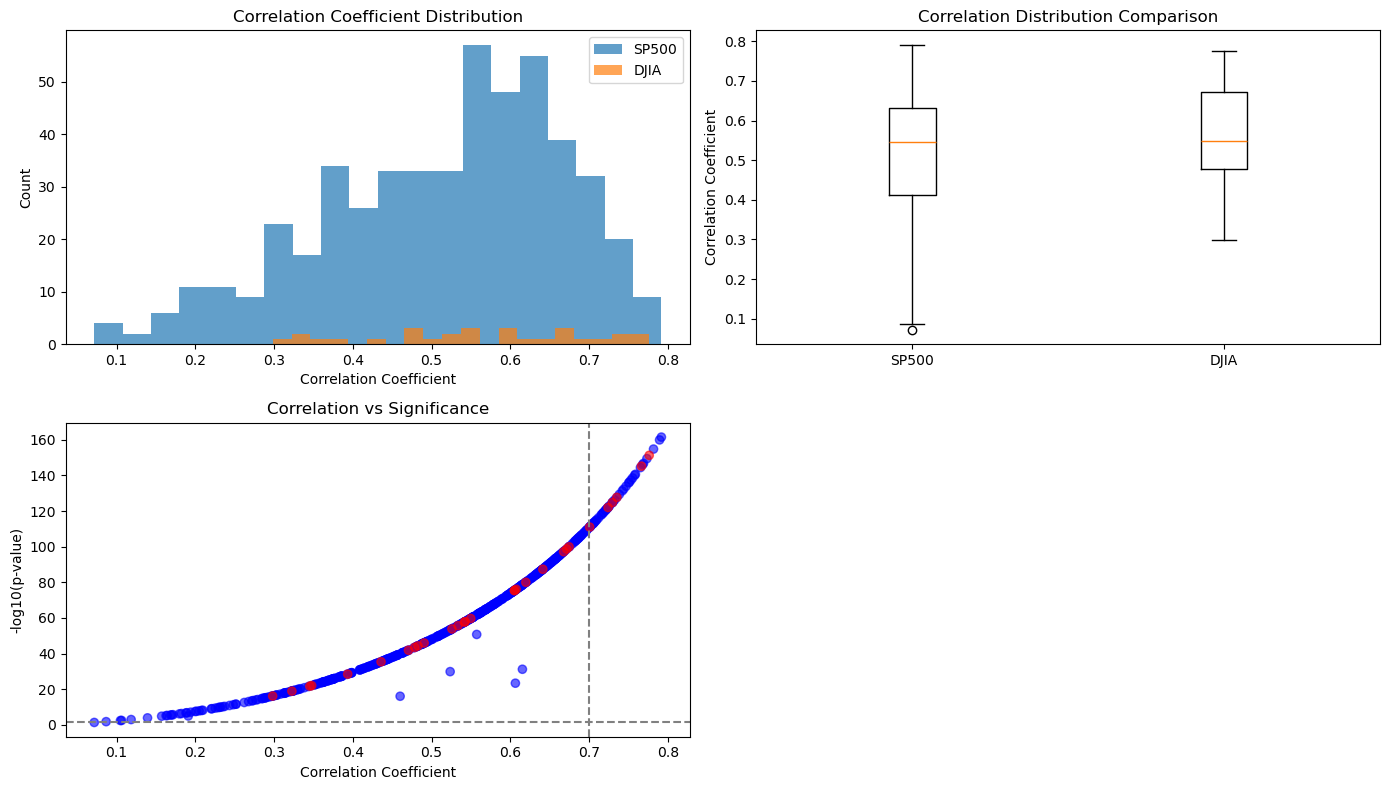

60 highly correlated stocks
SP500 46, DJIA 14


In [4]:
import pandas as pd
import numpy as np
import yfinance as yf
import requests
from bs4 import BeautifulSoup
from scipy.stats import pearsonr
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Configuration and Debug Functions setting
DEBUG_MODE = True

def log_message(message):
    if DEBUG_MODE:
        timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        print(f"[{timestamp}] {message}")

# Standerlization Stock Ticker 
def format_ticker(ticker):
    # Special handling for DJIA tickers
    mapping = {
        'MMM': '3M',       
        'DOW': 'DOW',      
        'BRK.B': 'BRK-B',   
    }
    return mapping.get(ticker, ticker.replace('.', '-'))

# Retrive Latest Index Component 
def get_index_components(index_name):
    if index_name == "SP500":
        url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
        table = pd.read_html(url)[0]
        symbols = table['Symbol'].tolist()
        
    elif index_name == "DJIA":
        url = "https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average"
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')
        table = soup.find('table', {'id': 'constituents'}) or soup.find('table', {'class': 'wikitable'})
        symbols = [row.find_all('td')[1].text.strip() for row in table.find_all('tr')[1:31]]
    else:
        raise ValueError("Unsupported index")
    
    # Apply formatting transformation
    formatted_symbols = [format_ticker(s) for s in symbols]
    log_message(f"Retrieved {index_name} components: {len(symbols)} raw, {len(formatted_symbols)} formatted")
    return formatted_symbols

# DATA Manipulating
 #Download historical price data
def download_stock_data(tickers, years=3):
    end_date = datetime.now()
    start_date = end_date - timedelta(days=365*years)
    
    log_message(f"Starting data download: {len(tickers)} stocks, time range {start_date.date()} to {end_date.date()}")
    
    data = yf.download(
        tickers,
        start=start_date,
        end=end_date,
        group_by='ticker',
        progress=False
    )
    
    # cleaning download result
    if data.empty:
        raise ValueError("Data download failed, returned empty DataFrame")
    
    valid_tickers = [col for col in data.columns.levels[0] if not data[col].dropna().empty]
    log_message(f"Download completed: Got data for {len(valid_tickers)} valid stocks")
    return data
#finding adj_coles or close
def get_adjusted_close(data, ticker):
    if data.columns.nlevels == 2:  # Multi-level index case
        try:
            # Try all possible column name variants
            possible_cols = ['Adj Close', 'Adj_Close', 'adj close', 'adj_close', 'Adjusted Close']
            for col in possible_cols:
                if col in data[ticker].columns:
                    return data[ticker][col]
            
            # Try any column containing "adj"
            for col in data[ticker].columns:
                if 'adj' in col.lower():
                    return data[ticker][col]
                    
        except KeyError:
            pass
        
        # Fallback to regular close price if needed
        return data[ticker]['Close']
    
    else:  # Single-level index case
        return data[ticker]

#calculating returns
def calculate_returns(prices):
    returns = pd.DataFrame()
    
    # Index returns
    try:
        sp500_price = get_adjusted_close(prices, '^GSPC')
        returns['SP500'] = sp500_price.pct_change().dropna()
    except Exception as e:
        log_message(f"SP500 return calculation failed: {str(e)}")
    
    try:
        djia_price = get_adjusted_close(prices, '^DJI')
        returns['DJIA'] = djia_price.pct_change().dropna()
    except Exception as e:
        log_message(f"DJIA return calculation failed: {str(e)}")
    
    # Get all stock tickers
    all_tickers = prices.columns.levels[0] if prices.columns.nlevels > 1 else prices.columns
    
    # Process each stock individually
    for ticker in all_tickers:
        if ticker in ['^GSPC', '^DJI']:
            continue
            
        try:
            # Get stock price
            price_series = get_adjusted_close(prices, ticker)
            stock_ret = price_series.pct_change().dropna()
            
            # Determine alignment benchmark
            # SP500 stocks align to SP500 index dates, DJIA stocks to DJIA index dates
            if ticker in sp500_components:
                base_series = returns.get('SP500', None)
            elif ticker in djia_components:
                base_series = returns.get('DJIA', None)
            else:
                continue
                
            # Data alignment
            if base_series is not None:
                aligned_ret = stock_ret.reindex(base_series.index, method=None).dropna()
                returns[ticker] = aligned_ret
        except Exception as e:
            log_message(f"Stock {ticker} return calculation failed: {str(e)}")
            continue
            
    return returns.dropna(how='all').dropna(axis=1, how='all')

#Corr Analysis
def analyze_correlations(returns_df):
    results = []
    
    # analyze stocks with sufficient data
    valid_stocks = [col for col in returns_df.columns if col not in ['SP500', 'DJIA'] and returns_df[col].count() >= 50]
    
    log_message(f"Starting correlation analysis: {len(valid_stocks)} valid stocks")
    
    # Analyze SP500
    sp500_stocks = [t for t in valid_stocks if t in sp500_components]
    for stock in sp500_stocks:
        try:
            # data merging
            merged = returns_df[[stock, 'SP500']].dropna()
            if len(merged) < 50:
                continue
                
            corr, p_value = pearsonr(merged[stock], merged['SP500'])
            results.append({
                'Ticker': stock,
                'Index': 'SP500',
                'Correlation': corr,
                'p-value': p_value
            })
        except Exception as e:
            log_message(f"SP500 stock {stock} correlation analysis failed: {str(e)}")
    
    # Analyze DJIA
    djia_stocks = [t for t in valid_stocks if t in djia_components]
    for stock in djia_stocks:
        try:
            # data merging
            merged = returns_df[[stock, 'DJIA']].dropna()
            if len(merged) < 50:
                continue
                
            corr, p_value = pearsonr(merged[stock], merged['DJIA'])
            results.append({
                'Ticker': stock,
                'Index': 'DJIA',
                'Correlation': corr,
                'p-value': p_value
            })
        except Exception as e:
            log_message(f"DJIA stock {stock} correlation analysis failed: {str(e)}")
    
    log_message(f"Correlation analysis completed: SP500 stocks {len(sp500_stocks)}, DJIA stocks {len(djia_stocks)}")
    return pd.DataFrame(results)

# Filter highly correlated stocks
def filter_results(results_df, min_corr=0.7, max_pvalue=0.05):
    if results_df.empty:
        log_message("Filtered results are empty")
        return pd.DataFrame()
        
    djia_mask = (results_df['Index'] == 'DJIA')
    results_df.loc[djia_mask, 'min_corr_threshold'] = min_corr - 0.1  # 0.6 for DJIA
    
    # Apply filtering
    filtered = results_df[
        (results_df['Correlation'].abs() > min_corr) & 
        (results_df['p-value'] < max_pvalue) |
        (results_df['Correlation'].abs() > (min_corr - 0.1)) & 
        (results_df['p-value'] < max_pvalue) & 
        (results_df['Index'] == 'DJIA')
    ]
    
    # If no DJIA stocks meet criteria, lower threshold further
    if filtered[filtered['Index'] == 'DJIA'].empty:
        filtered = results_df[
            (results_df['Correlation'].abs() > (min_corr - 0.15)) & 
            (results_df['p-value'] < max_pvalue) & 
            (results_df['Index'] == 'DJIA')
        ]
    
    return filtered.sort_values('Correlation', ascending=False)

#VISULIZATION
#Visualize correlation results
def visualize_results(results_df):
    if results_df.empty:
        log_message("No results to visualize")
        return
        
    plt.figure(figsize=(14, 8))
    
    # Separate results by index type
    sp500_results = results_df[results_df['Index'] == 'SP500']
    djia_results = results_df[results_df['Index'] == 'DJIA']
    
    # Correlation distribution histogram
    plt.subplot(2, 2, 1)
    plt.hist(sp500_results['Correlation'], bins=20, alpha=0.7, label='SP500')
    plt.hist(djia_results['Correlation'], bins=20, alpha=0.7, label='DJIA')
    plt.title('Correlation Coefficient Distribution')
    plt.xlabel('Correlation Coefficient')
    plt.ylabel('Count')
    plt.legend()
    
    # Box plot comparison
    plt.subplot(2, 2, 2)
    plt.boxplot(
        [sp500_results['Correlation'], djia_results['Correlation']],
        labels=['SP500', 'DJIA']
    )
    plt.title('Correlation Distribution Comparison')
    plt.ylabel('Correlation Coefficient')
    
    # Scatter plot (correlation vs p-value)
    plt.subplot(2, 2, 3)
    plt.scatter(
        results_df['Correlation'], 
        -np.log10(results_df['p-value']),
        c=results_df['Index'].map({'SP500': 'blue', 'DJIA': 'red'}),
        alpha=0.6
    )
    plt.axvline(x=0.7, color='gray', linestyle='--')
    plt.axhline(y=-np.log10(0.05), color='gray', linestyle='--')
    plt.title('Correlation vs Significance')
    plt.xlabel('Correlation Coefficient')
    plt.ylabel('-log10(p-value)')
    
    plt.tight_layout()
    plt.savefig('correlation_analysis.png')
    plt.show()

# Diagnostic Information
#Print diagnostic information
def print_diagnosis(results_df):
    if results_df.empty:
        print("No valid analysis results obtained")
        return
    
    # SP500 diagnostics
    sp500_results = results_df[results_df['Index'] == 'SP500']
    print("\n SP500 Diagnostics ")
    print(f"Stocks analyzed: {len(sp500_results)}")
    if not sp500_results.empty:
        print(f"Max correlation: {sp500_results['Correlation'].max():.4f}")
        print(f"Min correlation: {sp500_results['Correlation'].min():.4f}")
        print(f"Average correlation: {sp500_results['Correlation'].mean():.4f}")
        print(f"Significantly correlated stocks: {len(sp500_results[sp500_results['p-value'] < 0.05]) / len(sp500_results):.2%}")
    
    # DJIA diagnostics
    djia_results = results_df[results_df['Index'] == 'DJIA']
    print("\n DJIA Diagnostics ")
    print(f"Stocks analyzed: {len(djia_results)}")
    if not djia_results.empty:
        print(f"Max correlation: {djia_results['Correlation'].max():.4f}")
        print(f"Min correlation: {djia_results['Correlation'].min():.4f}")
        print(f"Average correlation: {djia_results['Correlation'].mean():.4f}")
        print(f"Significantly correlated stocks: {len(djia_results[djia_results['p-value'] < 0.05]) / len(djia_results):.2%}")
    
    # Missing data analysis
    missing_sp500 = set(sp500_components) - set(results_df[results_df['Index'] == 'SP500']['Ticker'])
    missing_djia = set(djia_components) - set(results_df[results_df['Index'] == 'DJIA']['Ticker'])
    
    print(f"\nSP500 stocks not analyzed: {len(missing_sp500)}")
    if missing_sp500:
        print(f"Missing SP500 stock examples: {list(missing_sp500)[:5]}...")
    
    print(f"DJIA stocks not analyzed: {len(missing_djia)}")
    if missing_djia:
        print(f"Missing DJIA stock examples: {list(missing_djia)[:5]}...")
# Whole procese testing
def main():
    global sp500_components, djia_components
    
    # Get index components
    try:
        sp500_components = get_index_components("SP500")
        djia_components = get_index_components("DJIA")
    except Exception as e:
        print(f"Failed to get index components: {str(e)}")
        return
        
    # Download data
    all_tickers = list(set(sp500_components + djia_components)) + ['^GSPC', '^DJI']
    try:
        price_data = download_stock_data(all_tickers)
    except Exception as e:
        print(f"Data download failed: {str(e)}")
        return
        
    # Calculate returns
    returns_df = calculate_returns(price_data)
    if returns_df.empty:
        print("Return calculation failed, returned empty DataFrame")
        return
        
    # Analyze correlations
    corr_results = analyze_correlations(returns_df)
    if corr_results.empty:
        print("Correlation analysis failed, returned empty result")
        return
        
    # Filter highly correlated stocks
    high_corr_stocks = filter_results(corr_results)
    
    # Output results
    if not high_corr_stocks.empty:
        print("\n Highly Correlated Stocks ")
        print(high_corr_stocks[['Ticker', 'Index', 'Correlation', 'p-value']])
        high_corr_stocks.to_csv('high_correlation_stocks.csv', index=False)
    else:
        print("\n Filter Results ")
        print("No highly correlated stocks found")
        
    # Output diagnostic information
    print_diagnosis(corr_results)
    
    # Visualize results
    try:
        visualize_results(corr_results)
    except Exception as e:
        print(f"Visualization failed: {str(e)}")
    
    return high_corr_stocks

if __name__ == "__main__":
    final_results = main()
    
    # Final Conclusion
    if not final_results.empty:
        sp500_count = len(final_results[final_results['Index'] == 'SP500'])
        djia_count = len(final_results[final_results['Index'] == 'DJIA'])
        print(f"{len(final_results)} highly correlated stocks")
        print(f"SP500 {sp500_count}, DJIA {djia_count}")